In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random
import numpy as np
import re
import plotly.express as px
import plotly.subplots as sp
import seaborn as sns

In [2]:
data_v19_otu =pd.read_csv('/home/sonec_iv/pike_ipynbs/single_mode_csvs/16S_all/single_V1_V9_merged_otu_table_all_samples_all_reads.csv',index_col=0)
data_v19_g =pd.read_csv('/home/sonec_iv/pike_ipynbs/single_mode_csvs/16S_all/single_V1_V9_data_tax_df_genus.csv', sep='\t',index_col=0)
data_v19_s =pd.read_csv('/home/sonec_iv/pike_ipynbs/single_mode_csvs/16S_all/single_V1_V9_data_tax_df_species.csv', sep='\t',index_col=0)

data_v34_otu =pd.read_csv('/home/sonec_iv/pike_ipynbs/single_mode_csvs/16S_all/single_V3_V4_merged_otu_table_all_samples_all_reads.csv',index_col=0)
data_v34_g =pd.read_csv('/home/sonec_iv/pike_ipynbs/single_mode_csvs/16S_all/single_V3_V4_data_tax_df_genus.csv', sep='\t',index_col=0)
data_v34_s =pd.read_csv('/home/sonec_iv/pike_ipynbs/single_mode_csvs/16S_all/single_V3_V4_data_tax_df_species.csv', sep='\t',index_col=0)


In [3]:
number_mapping = {col: int(col.split('_')[-2]) for col in data_v34_g.columns}
sorted_columns = sorted(number_mapping, key=number_mapping.get)
data_v34_g_sorted = data_v34_g[sorted_columns]
data_v34_s_sorted = data_v34_s[sorted_columns]
data_v34_otu_sorted = data_v34_otu[sorted_columns]

In [ ]:
sorted_columns

In [4]:
number_mapping2 = {col: int(col.split('_')[-2]) for col in data_v19_g.columns}
sorted_columns2 = sorted(number_mapping2, key=number_mapping2.get)
data_v19_g_sorted = data_v19_g[sorted_columns2]
data_v19_s_sorted = data_v19_s[sorted_columns2]
data_v19_otu_sorted = data_v19_otu[sorted_columns2]

In [5]:
for column in data_v34_otu_sorted.columns: 
    data_v34_otu_sorted[column] = data_v34_otu_sorted[column]/data_v34_otu_sorted[column].sum()
for column in data_v19_otu_sorted.columns: 
    data_v19_otu_sorted[column] = data_v19_otu_sorted[column]/data_v19_otu_sorted[column].sum()

In [6]:
def get_color(obj_dict):
    color = ''
    while color not in obj_dict.values() and color == '':  
        color = "#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    return color
color_collection_v34_g = {}
color_collection_v34_s = {}
color_collection_v34_otu = {}
color_collection_v19_g = {}
color_collection_v19_s = {}
color_collection_v19_otu = {}

In [7]:
for i in data_v34_g_sorted.index:
    color_collection_v34_g[i] = get_color(color_collection_v34_g)
for i in data_v34_s_sorted.index:
    color_collection_v34_s[i] = get_color(color_collection_v34_s)
for i in data_v34_otu_sorted.index:
    color_collection_v34_otu[i] = get_color(color_collection_v34_otu)
for i in data_v19_g_sorted.index:
    color_collection_v19_g[i] = get_color(color_collection_v19_g)
for i in data_v19_s_sorted.index:
    color_collection_v19_s[i] = get_color(color_collection_v19_s)
for i in data_v19_otu_sorted.index:
    color_collection_v19_otu[i] = get_color(color_collection_v19_otu)

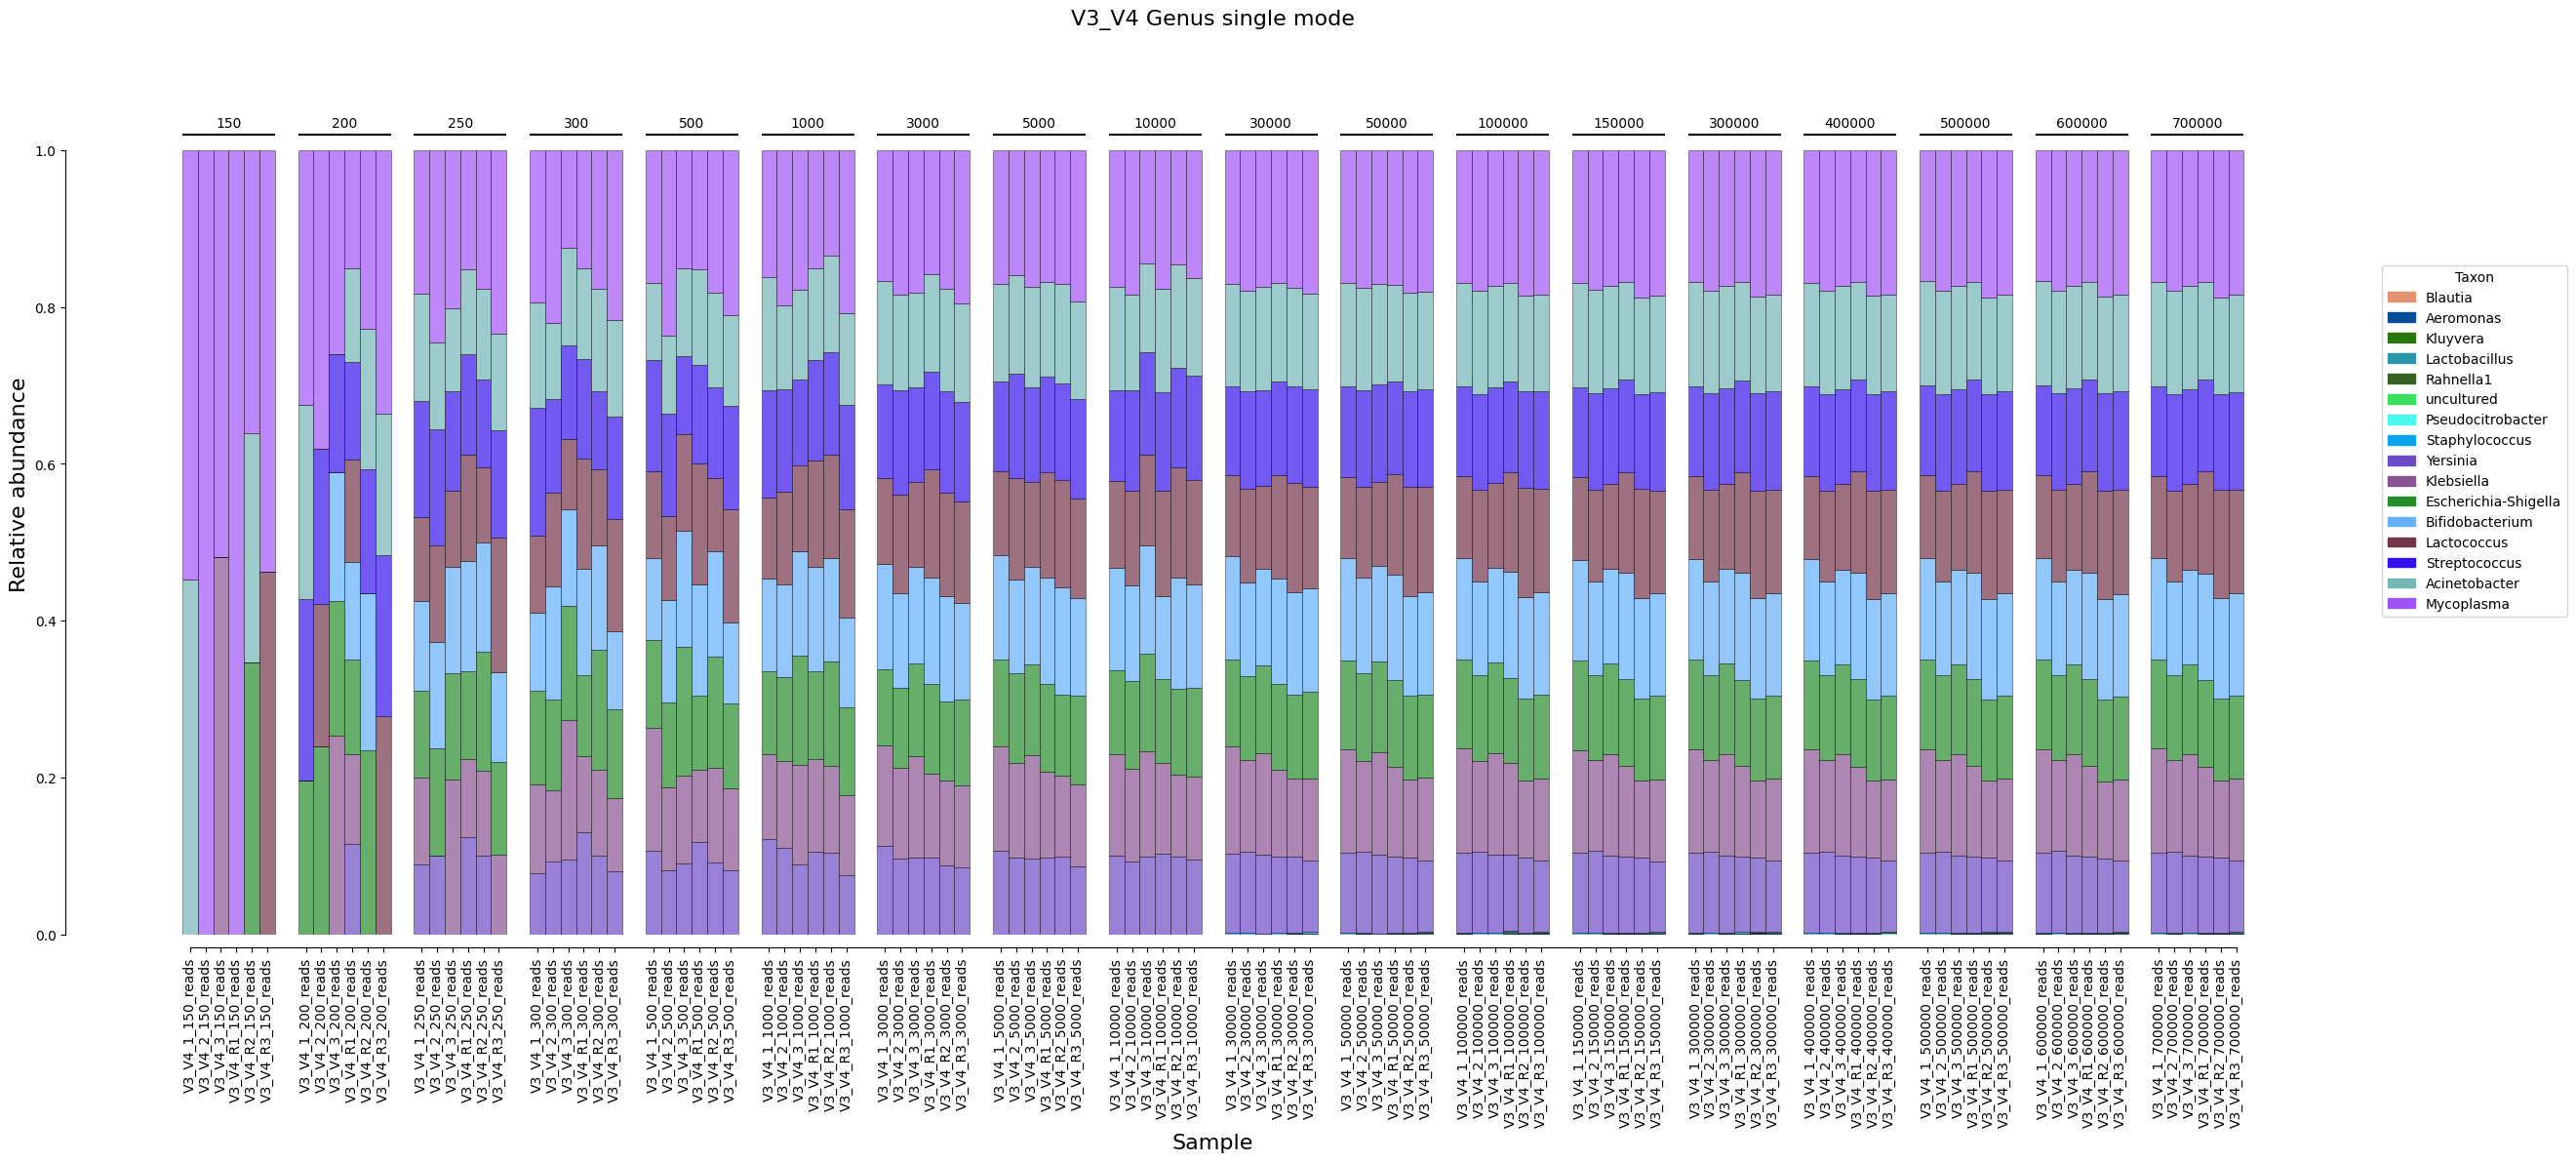

In [8]:
sample_coord = 0
sample_coords_list = []
counter = 0
width = 1
bottom = 0
#plt.rcParams["figure.figsize"] = (12, 12)
plt.figure(figsize=(30, 12))
for sample in data_v34_g_sorted.columns:
    for genus in data_v34_g_sorted.index:
        plt.bar(sample_coord, 
                    data_v34_g_sorted[sample][genus], 
                    width,  
                    bottom=bottom,
                    label = genus,
                    edgecolor='black',
                    linewidth=0.4, 
                    alpha=0.7,
                    color=color_collection_v34_g[genus])
        bottom += data_v34_g_sorted[sample][genus]
    sample_coords_list.append(sample_coord)
    sample_coord += 1
    counter +=1
    if counter % 6 == 0:
        sample_coords_list.append(sample_coord)
        sample_coord += 1.5
        counter = 0
    bottom = 0

new_list = [item for index, item in enumerate(sample_coords_list) if (index + 1) % 7 != 0]
plt.xticks(ticks = new_list, labels = data_v34_g_sorted.columns, rotation = 'vertical')
sns.despine(offset=10, trim=True)
plt.xlabel("Sample", fontsize = 16)
plt.ylim(top=1.15)
new_list = [item for index, item in enumerate(sample_coords_list) if (index + 1) % 7 != 0]
plt.xticks(ticks = new_list, labels = data_v34_g_sorted.columns, rotation = 'vertical')

y = 1.02 
str_length = 6  
gap_btw = 1.5  
max_x = 136.5 
x_start = -0.5
x_values = []
hline_labels = ['150','200','250','300','500','1000','3000','5000','10000','30000','50000',
                '100000','150000','300000','400000','500000','600000','700000']

while x_start <= max_x:
    x_values.append((x_start, x_start + str_length))  
    x_start += str_length + gap_btw 

for (start, end), labels in zip(x_values, hline_labels):
    plt.hlines(y, start, end, color='black')
    plt.text((start + end) / 2, y + 0.01, labels, ha='center')
patches = [mpatches.Patch(color=color, label=genus) for genus, color in color_collection_v34_g.items()]
plt.ylabel("Relative abundance", fontsize = 16)
plt.legend(handles = patches,title='Taxon',bbox_to_anchor = (1.1,0.75))
plt.title('V3_V4 Genus single mode', loc = 'center', fontsize = 16)
plt.savefig("V34_genus_abundance_SINGLE_fixed.pdf",format="pdf", bbox_inches="tight")
plt.savefig("V34_genus_abundance_SINGLE_fixed.png", dpi=800, format="png", bbox_inches='tight')
#plt.tight_layout()

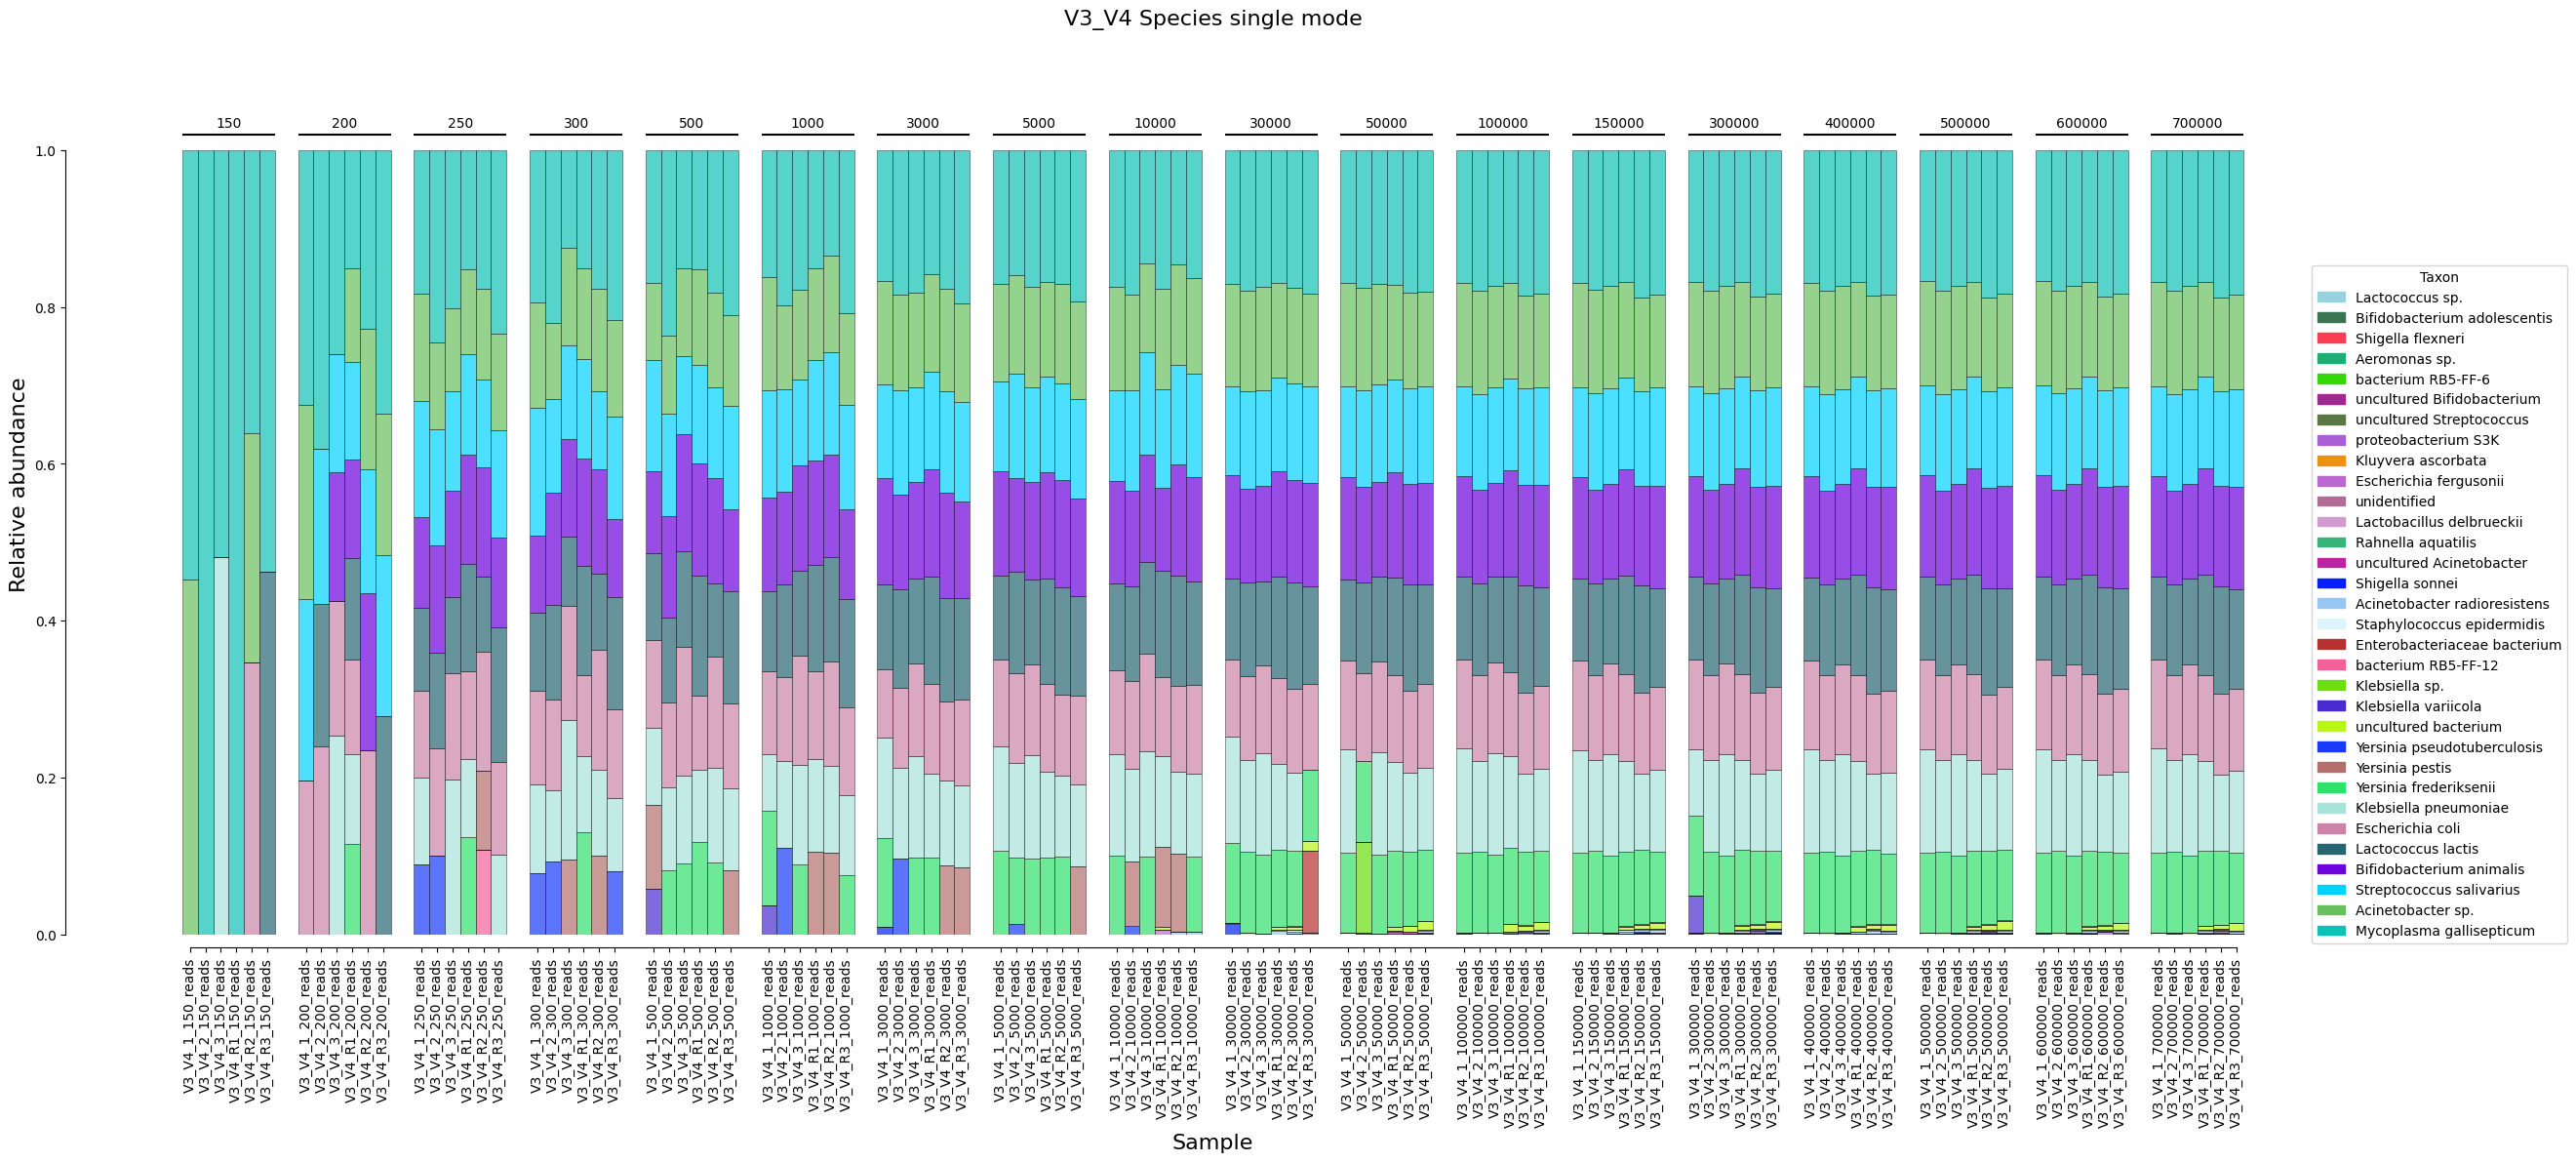

In [9]:
sample_coord = 0
sample_coords_list = []
counter = 0
width = 1
bottom = 0
#plt.rcParams["figure.figsize"] = (12, 12)
plt.figure(figsize=(30, 12))
for sample in data_v34_s_sorted.columns:
    for genus in data_v34_s_sorted.index:
        plt.bar(sample_coord, 
                    data_v34_s_sorted[sample][genus], 
                    width,  
                    bottom=bottom,
                    label = genus,
                    edgecolor='black',
                    linewidth=0.4, 
                    alpha=0.7,
                    color=color_collection_v34_s[genus])
        bottom += data_v34_s_sorted[sample][genus]
    sample_coords_list.append(sample_coord)
    sample_coord += 1
    counter +=1
    if counter % 6 == 0:
        sample_coords_list.append(sample_coord)
        sample_coord += 1.5
        counter = 0
    bottom = 0

new_list = [item for index, item in enumerate(sample_coords_list) if (index + 1) % 7 != 0]
plt.xticks(ticks = new_list, labels = data_v34_s_sorted.columns, rotation = 'vertical')
sns.despine(offset=10, trim=True)
plt.xlabel("Sample", fontsize = 16)
plt.ylim(top=1.15)
new_list = [item for index, item in enumerate(sample_coords_list) if (index + 1) % 7 != 0]
plt.xticks(ticks = new_list, labels = data_v34_s_sorted.columns, rotation = 'vertical')

y = 1.02 
str_length = 6  
gap_btw = 1.5  
max_x = 136.5 
x_start = -0.5
x_values = []
hline_labels = ['150','200','250','300','500','1000','3000','5000','10000','30000','50000',
                '100000','150000','300000','400000','500000','600000','700000']

while x_start <= max_x:
    x_values.append((x_start, x_start + str_length))  
    x_start += str_length + gap_btw 

for (start, end), labels in zip(x_values, hline_labels):
    plt.hlines(y, start, end, color='black')
    plt.text((start + end) / 2, y + 0.01, labels, ha='center')
patches = [mpatches.Patch(color=color, label=genus) for genus, color in color_collection_v34_s.items()]
plt.ylabel("Relative abundance", fontsize = 16)
plt.legend(handles = patches,title='Taxon',bbox_to_anchor = (1.1,0.75))
plt.title('V3_V4 Species single mode', loc = 'center', fontsize = 16)
plt.savefig("V34_species_abundance_SINGLE_fixed.pdf",format="pdf", bbox_inches="tight")
plt.savefig("V34_species_abundance_SINGLE_fixed.png", dpi=800, format="png", bbox_inches='tight')
#plt.tight_layout()

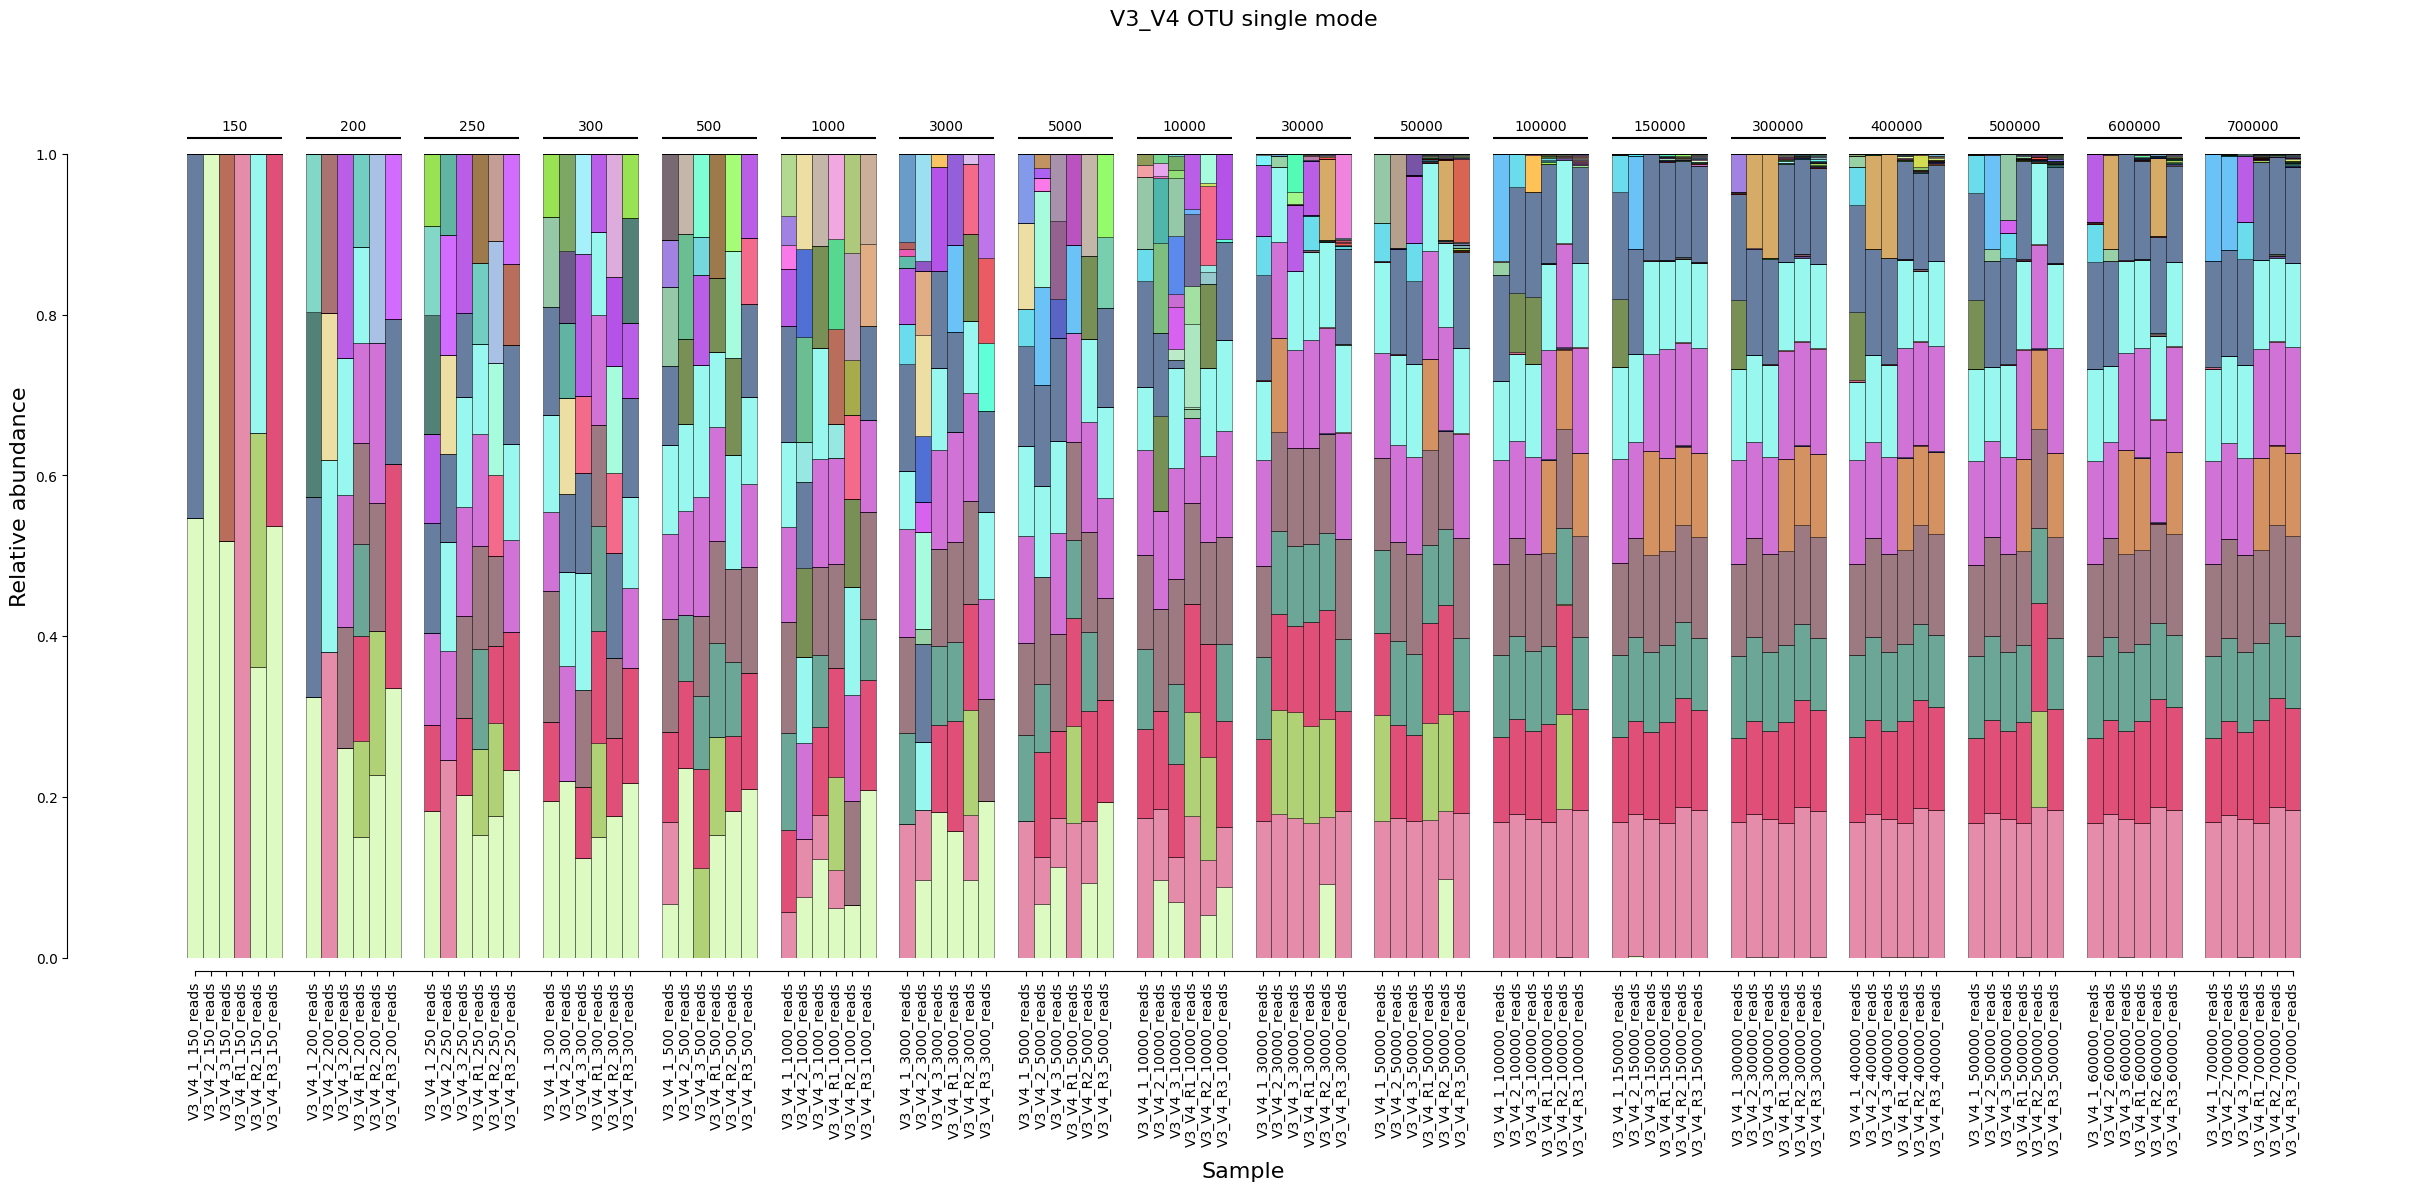

In [10]:
sample_coord = 0
sample_coords_list = []
counter = 0
width = 1
bottom = 0
#plt.rcParams["figure.figsize"] = (12, 12)
plt.figure(figsize=(30, 12))
for sample in data_v34_otu_sorted.columns:
    for genus in data_v34_otu_sorted.index:
        plt.bar(sample_coord, 
                    data_v34_otu_sorted[sample][genus], 
                    width,  
                    bottom=bottom,
                    label = genus,
                    edgecolor='black',
                    linewidth=0.4, 
                    alpha=0.7,
                    color=color_collection_v34_otu[genus])
        bottom += data_v34_otu_sorted[sample][genus]
    sample_coords_list.append(sample_coord)
    sample_coord += 1
    counter +=1
    if counter % 6 == 0:
        sample_coords_list.append(sample_coord)
        sample_coord += 1.5
        counter = 0
    bottom = 0

new_list = [item for index, item in enumerate(sample_coords_list) if (index + 1) % 7 != 0]
plt.xticks(ticks = new_list, labels = data_v34_otu_sorted.columns, rotation = 'vertical')
sns.despine(offset=10, trim=True)
plt.xlabel("Sample", fontsize = 16)
plt.ylim(top=1.15)
new_list = [item for index, item in enumerate(sample_coords_list) if (index + 1) % 7 != 0]
plt.xticks(ticks = new_list, labels = data_v34_otu_sorted.columns, rotation = 'vertical')

y = 1.02 
str_length = 6  
gap_btw = 1.5  
max_x = 136.5 
x_start = -0.5
x_values = []
hline_labels = ['150','200','250','300','500','1000','3000','5000','10000','30000','50000',
                '100000','150000','300000','400000','500000','600000','700000']

while x_start <= max_x:
    x_values.append((x_start, x_start + str_length))  
    x_start += str_length + gap_btw 

for (start, end), labels in zip(x_values, hline_labels):
    plt.hlines(y, start, end, color='black')
    plt.text((start + end) / 2, y + 0.01, labels, ha='center')
#patches = [mpatches.Patch(color=color, label=genus) for genus, color in color_collection_v34_s.items()]
plt.ylabel("Relative abundance", fontsize = 16)
#plt.legend(handles = patches,title='Taxon',bbox_to_anchor = (1.1,0.75))
plt.title('V3_V4 OTU single mode', loc = 'center', fontsize = 16)
plt.savefig("V34_OTU_abundance_SINGLE_fixed.pdf",format="pdf", bbox_inches="tight")
plt.savefig("V34_OTU_abundance_SINGLE_fixed.png", dpi=800, format="png", bbox_inches='tight')
#plt.tight_layout()

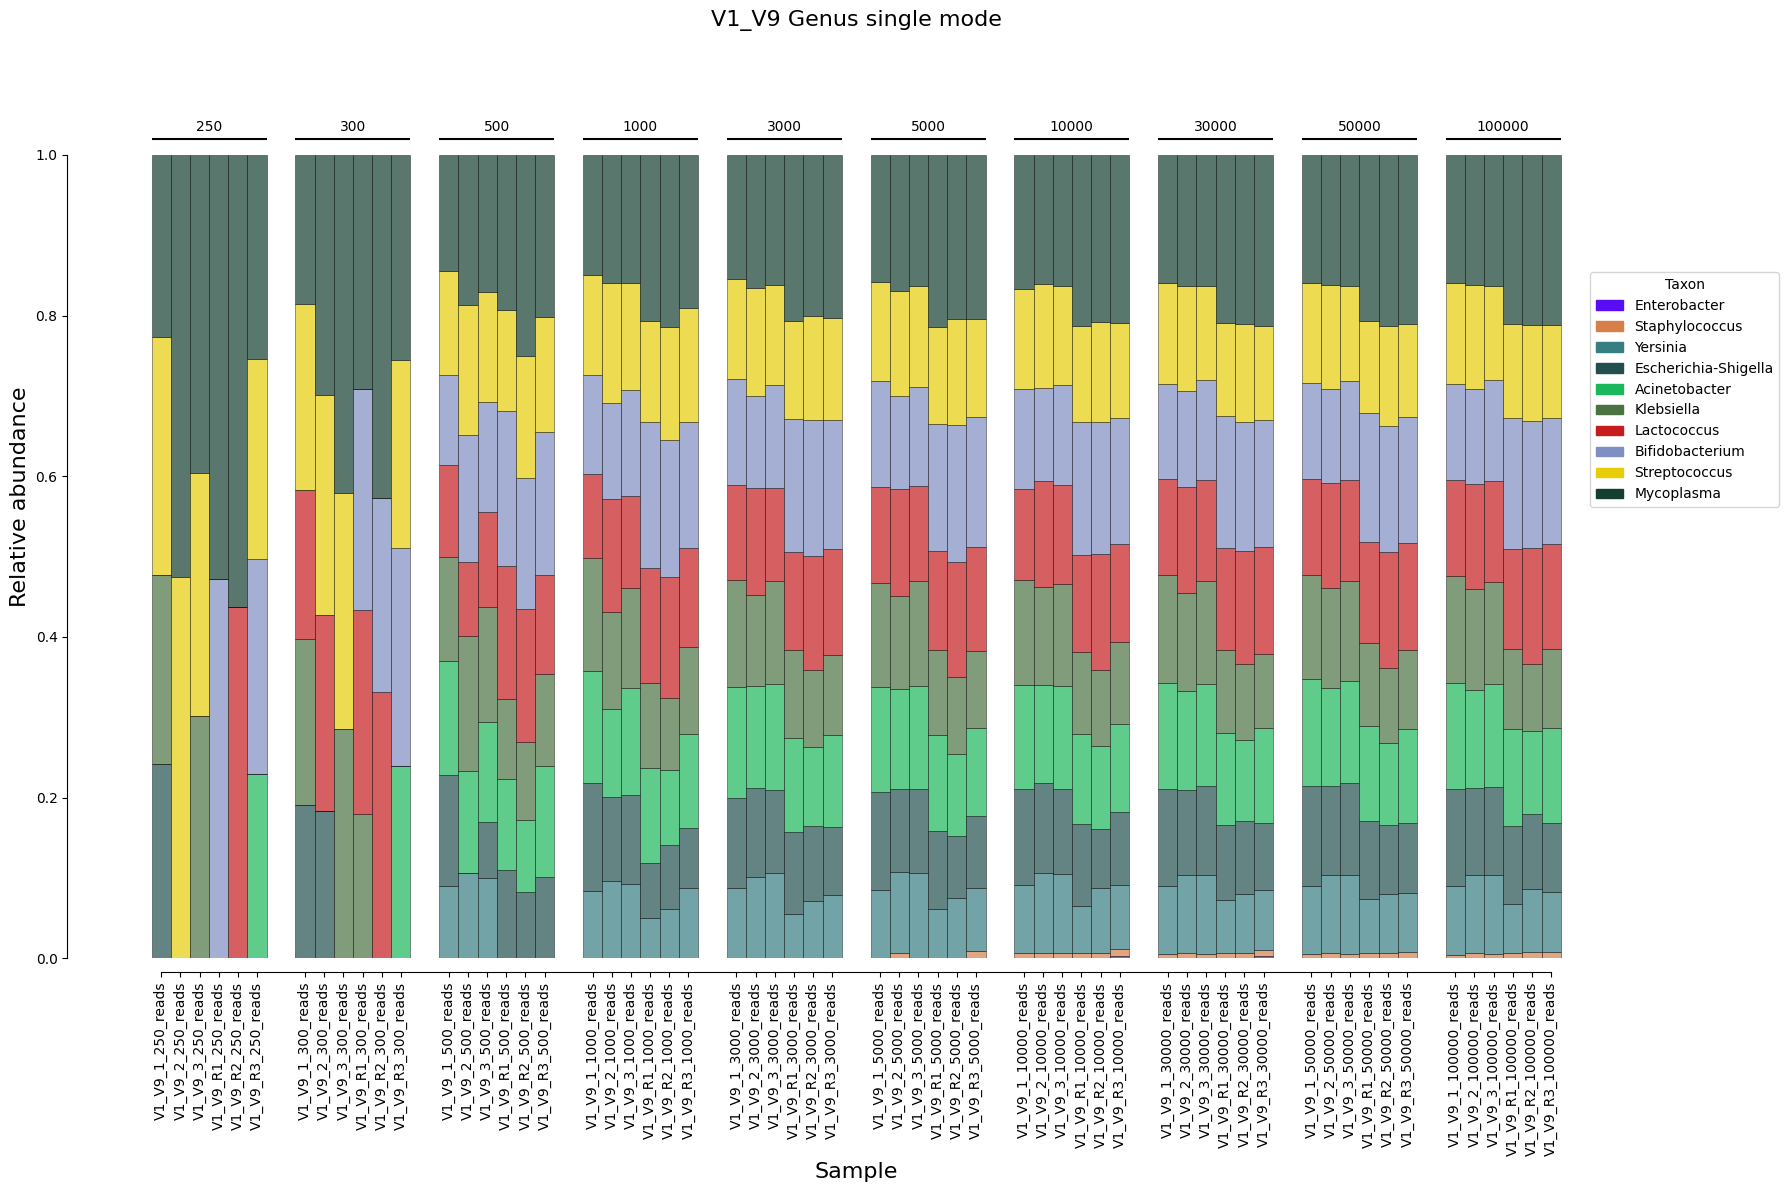

In [11]:
sample_coord = 0
sample_coords_list = []
counter = 0
width = 1
bottom = 0
#plt.rcParams["figure.figsize"] = (12, 12)
plt.figure(figsize=(20, 12))
for sample in data_v19_g_sorted.columns:
    for genus in data_v19_g_sorted.index:
        plt.bar(sample_coord, 
                    data_v19_g_sorted[sample][genus], 
                    width,  
                    bottom=bottom,
                    label = genus,
                    edgecolor='black',
                    linewidth=0.4, 
                    alpha=0.7,
                    color=color_collection_v19_g[genus])
        bottom += data_v19_g_sorted[sample][genus]
    sample_coords_list.append(sample_coord)
    sample_coord += 1
    counter +=1
    if counter % 6 == 0:
        sample_coords_list.append(sample_coord)
        sample_coord += 1.5
        counter = 0
    bottom = 0

new_list = [item for index, item in enumerate(sample_coords_list) if (index + 1) % 7 != 0]
plt.xticks(ticks = new_list, labels = data_v19_g_sorted.columns, rotation = 'vertical')
sns.despine(offset=10, trim=True)
plt.xlabel("Sample", fontsize = 16)
plt.ylim(top=1.15)
new_list = [item for index, item in enumerate(sample_coords_list) if (index + 1) % 7 != 0]
plt.xticks(ticks = new_list, labels = data_v19_g_sorted.columns, rotation = 'vertical')

y = 1.02 
str_length = 6  
gap_btw = 1.5  
max_x = 102.5 
x_start = -0.5
x_values = []
hline_labels = ['250','300','500','1000','3000','5000','10000','30000','50000','100000']

while x_start <= max_x:
    x_values.append((x_start, x_start + str_length))  
    x_start += str_length + gap_btw 

for (start, end), labels in zip(x_values, hline_labels):
    plt.hlines(y, start, end, color='black')
    plt.text((start + end) / 2, y + 0.01, labels, ha='center')
patches = [mpatches.Patch(color=color, label=genus) for genus, color in color_collection_v19_g.items()]
plt.ylabel("Relative abundance", fontsize = 16)
plt.legend(handles = patches,title='Taxon',bbox_to_anchor = (1.1,0.75))
plt.title('V1_V9 Genus single mode', loc = 'center', fontsize = 16)
plt.savefig("V19_genus_abundance_SINGLE_fixed.pdf",format="pdf", bbox_inches="tight")
plt.savefig("V19_genus_abundance_SINGLE_fixed.png", dpi=800, format="png", bbox_inches='tight')

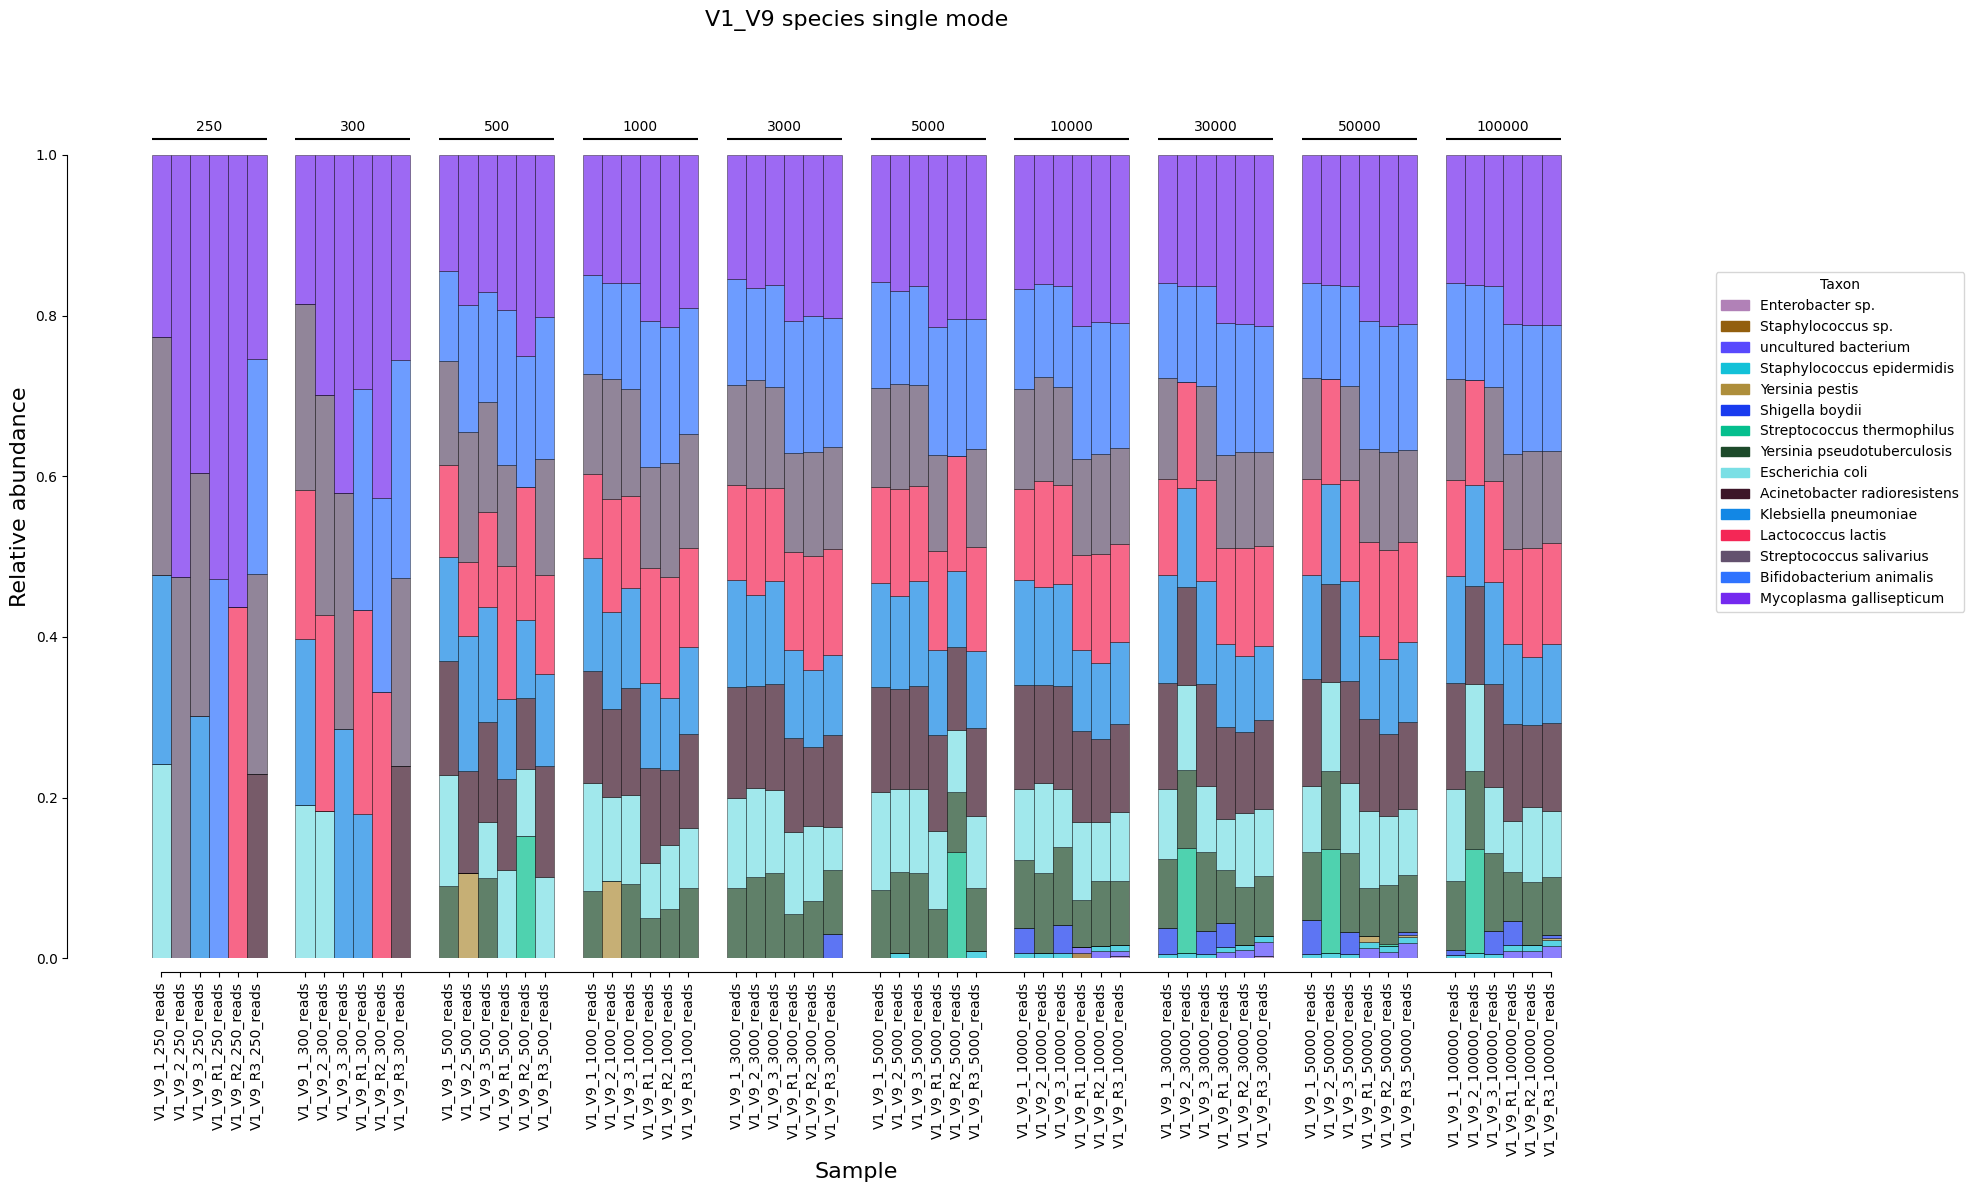

In [12]:
sample_coord = 0
sample_coords_list = []
counter = 0
width = 1
bottom = 0
#plt.rcParams["figure.figsize"] = (12, 12)
plt.figure(figsize=(20, 12))
for sample in data_v19_s_sorted.columns:
    for genus in data_v19_s_sorted.index:
        plt.bar(sample_coord, 
                    data_v19_s_sorted[sample][genus], 
                    width,  
                    bottom=bottom,
                    label = genus,
                    edgecolor='black',
                    linewidth=0.4, 
                    alpha=0.7,
                    color=color_collection_v19_s[genus])
        bottom += data_v19_s_sorted[sample][genus]
    sample_coords_list.append(sample_coord)
    sample_coord += 1
    counter +=1
    if counter % 6 == 0:
        sample_coords_list.append(sample_coord)
        sample_coord += 1.5
        counter = 0
    bottom = 0

new_list = [item for index, item in enumerate(sample_coords_list) if (index + 1) % 7 != 0]
plt.xticks(ticks = new_list, labels = data_v19_s_sorted.columns, rotation = 'vertical')
sns.despine(offset=10, trim=True)
plt.xlabel("Sample", fontsize = 16)
plt.ylim(top=1.15)
new_list = [item for index, item in enumerate(sample_coords_list) if (index + 1) % 7 != 0]
plt.xticks(ticks = new_list, labels = data_v19_s_sorted.columns, rotation = 'vertical')

y = 1.02 
str_length = 6  
gap_btw = 1.5  
max_x = 102.5 
x_start = -0.5
x_values = []
hline_labels = ['250','300','500','1000','3000','5000','10000','30000','50000','100000']

while x_start <= max_x:
    x_values.append((x_start, x_start + str_length))  
    x_start += str_length + gap_btw 

for (start, end), labels in zip(x_values, hline_labels):
    plt.hlines(y, start, end, color='black')
    plt.text((start + end) / 2, y + 0.01, labels, ha='center')
patches = [mpatches.Patch(color=color, label=genus) for genus, color in color_collection_v19_s.items()]
plt.ylabel("Relative abundance", fontsize = 16)
plt.legend(handles = patches,title='Taxon',bbox_to_anchor = (1.05,0.75))
plt.title('V1_V9 species single mode', loc = 'center', fontsize = 16)
plt.savefig("V19_species_abundance_SINGLE_fixed.pdf",format="pdf", bbox_inches="tight")
plt.savefig("V19_species_abundance_SINGLE_fixed.png", dpi=800, format="png", bbox_inches='tight')

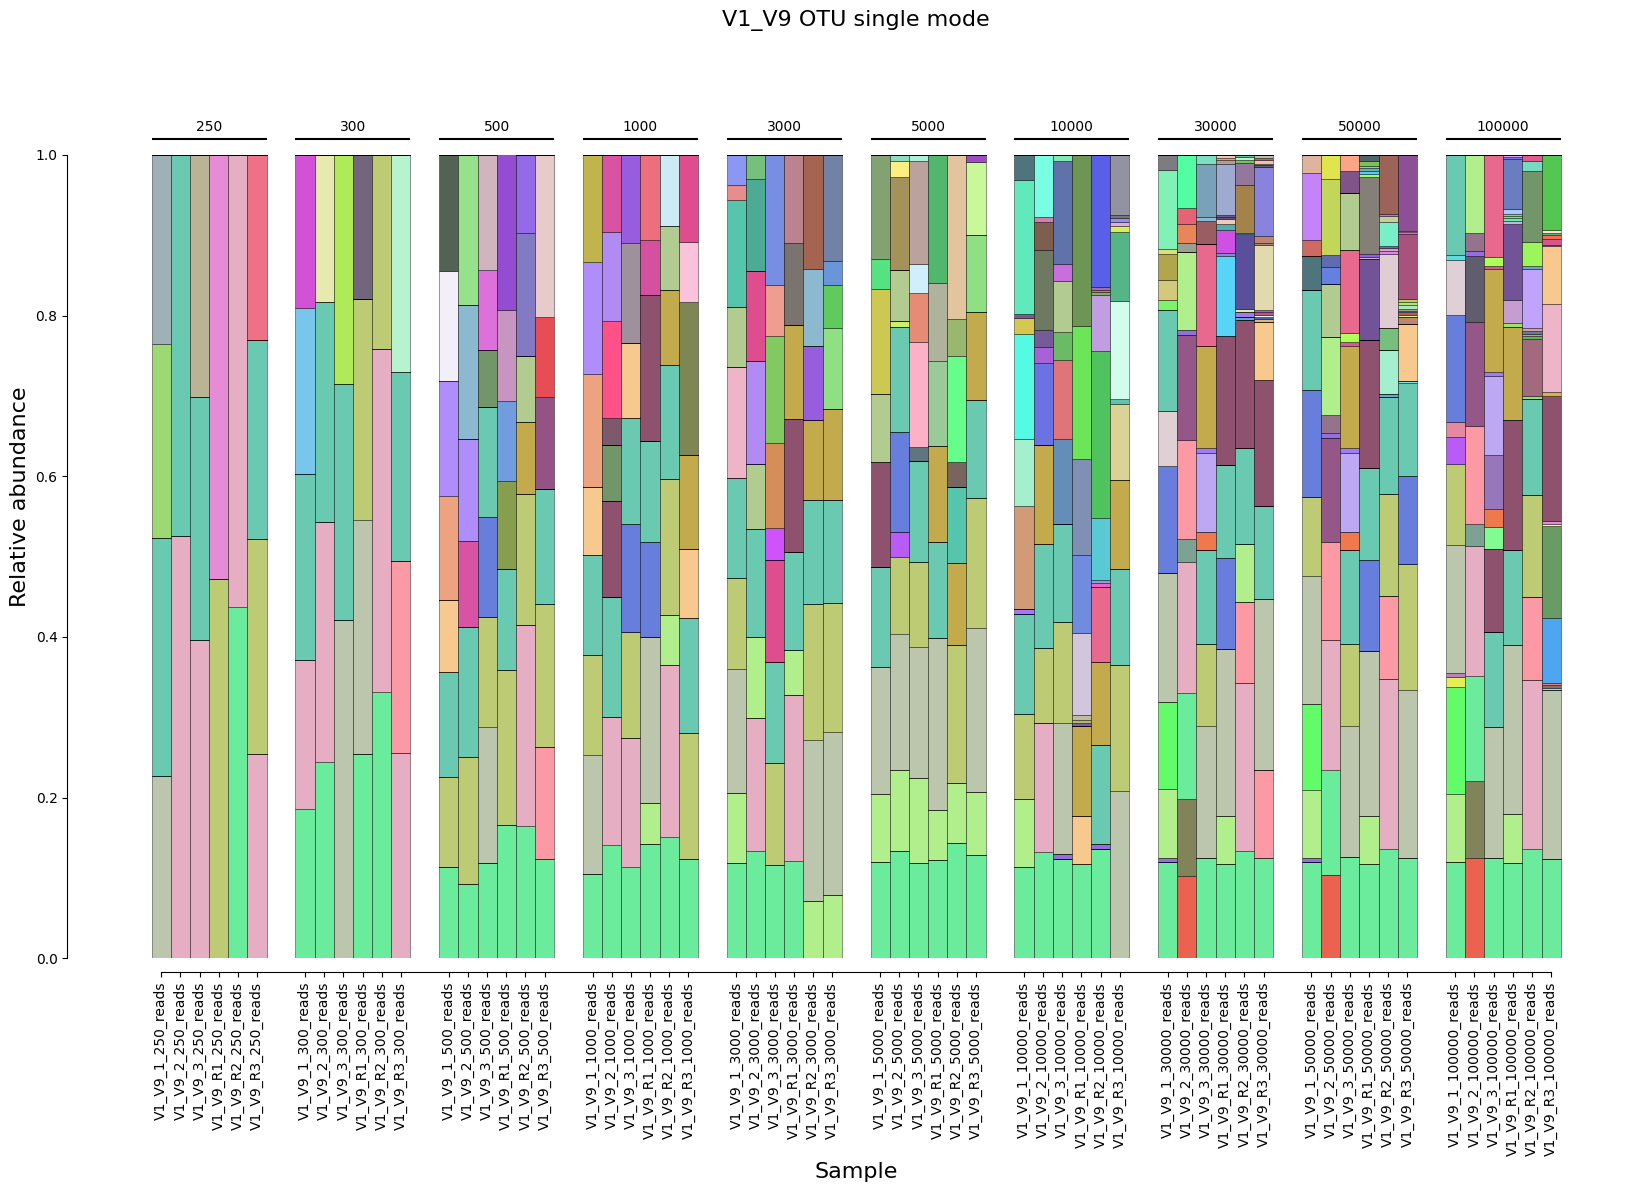

In [13]:
sample_coord = 0
sample_coords_list = []
counter = 0
width = 1
bottom = 0
#plt.rcParams["figure.figsize"] = (12, 12)
plt.figure(figsize=(20, 12))
for sample in data_v19_otu_sorted.columns:
    for genus in data_v19_otu_sorted.index:
        plt.bar(sample_coord, 
                    data_v19_otu_sorted[sample][genus], 
                    width,  
                    bottom=bottom,
                    label = genus,
                    edgecolor='black',
                    linewidth=0.4, 
                    alpha=0.7,
                    color=color_collection_v19_otu[genus])
        bottom += data_v19_otu_sorted[sample][genus]
    sample_coords_list.append(sample_coord)
    sample_coord += 1
    counter +=1
    if counter % 6 == 0:
        sample_coords_list.append(sample_coord)
        sample_coord += 1.5
        counter = 0
    bottom = 0

new_list = [item for index, item in enumerate(sample_coords_list) if (index + 1) % 7 != 0]
plt.xticks(ticks = new_list, labels = data_v19_otu_sorted.columns, rotation = 'vertical')
sns.despine(offset=10, trim=True)
plt.xlabel("Sample", fontsize = 16)
plt.ylim(top=1.15)
new_list = [item for index, item in enumerate(sample_coords_list) if (index + 1) % 7 != 0]
plt.xticks(ticks = new_list, labels = data_v19_otu_sorted.columns, rotation = 'vertical')

y = 1.02 
str_length = 6  
gap_btw = 1.5  
max_x = 102.5 
x_start = -0.5
x_values = []
hline_labels = ['250','300','500','1000','3000','5000','10000','30000','50000','100000']

while x_start <= max_x:
    x_values.append((x_start, x_start + str_length))  
    x_start += str_length + gap_btw 

for (start, end), labels in zip(x_values, hline_labels):
    plt.hlines(y, start, end, color='black')
    plt.text((start + end) / 2, y + 0.01, labels, ha='center')
#patches = [mpatches.Patch(color=color, label=genus) for genus, color in color_collection_v19_otu.items()]
plt.ylabel("Relative abundance", fontsize = 16)
#plt.legend(handles = patches,title='Taxon',bbox_to_anchor = (1.1,0.75))
plt.title('V1_V9 OTU single mode', loc = 'center', fontsize = 16)
plt.savefig("V19_OTU_abundance_SINGLE_fixed.pdf",format="pdf", bbox_inches="tight")
plt.savefig("V19_OTU_abundance_SINGLE_fixed.png", dpi=800, format="png", bbox_inches='tight')